In [ ]:
import osos.chdir('..')

Current working directory: c:\Users\HomePC\DesktopReady to run Lab 1!

# Lab 1: Compare Memory-Based versus Generator-Based Data Loading## AI Capstone Project with Deep LearningThis lab focuses on comparing memory-based and generator-based data loading approaches for agricultural land classification using satellite imagery.### Tasks:1. Determine the shape (dimensions) of a single image stored in the image_data variable2. Display the first four images in './images_dataSAT/class_0_non_agri/' directory3. Create a list named agri_images_paths that contains the full file paths of all images located in the dir_agri directory4. Determine the number of images of agricultural land that exist in the './images_dataSAT/class_1_agri/' directory

In [27]:
# Create necessary directories for the labimport os# Create directories if they don't exist (using absolute path from project root)os.makedirs('../images_dataSAT/class_0_non_agri', exist_ok=True)os.makedirs('../images_dataSAT/class_1_agri', exist_ok=True)print("Directories created successfully!")print(" - ../images_dataSAT/class_0_non_agri/")print(" - ../images_dataSAT/class_1_agri/")

Directories created successfully!- ../images_dataSAT/class_0_non_agri/- ../images_dataSAT/class_1_agri/

In [29]:
# Create realistic satellite images for demonstrationdef create_realistic_sample_images():# Create non-agricultural land images (class 0) - Urban/Forest areasfor i in range(20):# Base image with urban/forest colorsimg = np.zeros((64, 64, 3), dtype=np.uint8)# Add urban/forest-like patternsif i < 10:# Urban areas# Buildings and roadsimg[:, :] = [60, 60, 60]# Dark gray base# Add some building-like structuresfor x in range(0, 64, 16):for y in range(0, 64, 16):if np.random.random() > 0.3:img[y:y+12, x:x+12] = [80, 80, 80]# Buildings# Add roadsimg[30:34, :] = [40, 40, 40]# Horizontal roadimg[:, 30:34] = [40, 40, 40]# Vertical roadelse:# Forest areas# Forest green baseimg[:, :] = [30, 60, 30]# Dark green# Add tree-like patternsfor x in range(0, 64, 8):for y in range(0, 64, 8):if np.random.random() > 0.4:img[y:y+6, x:x+6] = [20, 80, 20]# Trees# Add some noise for realismnoise = np.random.randint(-20, 20, (64, 64, 3))img = np.clip(img.astype(np.int16) + noise, 0, 255).astype(np.uint8)# Save imageimage_path = f'./images_dataSAT/class_0_non_agri/non_agri_{i:03d}.png'Image.fromarray(img).save(image_path)# Create agricultural land images (class 1) - Farm fieldsfor i in range(25):# Base image with agricultural colorsimg = np.zeros((64, 64, 3), dtype=np.uint8)# Agricultural field patternsif i < 12:# Crop fields# Brown soil baseimg[:, :] = [139, 69, 19]# Saddle brown# Add crop rowsfor y in range(0, 64, 4):if y % 8 < 4:# Every other rowimg[y:y+2, :] = [34, 139, 34]# Green cropselse:# Different crop types# Different soil colorsbase_colors = [[160, 82, 45],# Sienna[210, 180, 140],# Tan[222, 184, 135],# Burlywood]img[:, :] = base_colors[i % 3]# Add different crop patternsfor y in range(0, 64, 6):if y % 12 < 6:img[y:y+3, :] = [50, 205, 50]# Lime green crops# Add some variation and noisevariation = np.random.randint(-15, 15, (64, 64, 3))img = np.clip(img.astype(np.int16) + variation, 0, 255).astype(np.uint8)# Save imageimage_path = f'./images_dataSAT/class_1_agri/agri_{i:03d}.png'Image.fromarray(img).save(image_path)print("Realistic satellite images created successfully!")# Create realistic sample imagescreate_realistic_sample_images()

Realistic satellite images created successfully!

In [31]:
# Import necessary librariesimport numpyasnpimport matplotlib.pyplot as pltimport osfromPILimportImageimportglobfrom pathlib importPathimportrandom

In [24]:
# Create sample satellite images for demonstrationdef create_sample_images():"""Create sample satellite images for agricultural land classification"""# Create non-agricultural land images (class 0)for i in range(20):# Create random image with urban/forest-like patternsimg = np.random.randint(50, 150, (64, 64, 3), dtype=np.uint8)# Add some structure to make it look more realisticimg[20:40, 20:40] = [100, 120, 80]# Different colored region# Save imageimage_path = f'./images_dataSAT/class_0_non_agri/non_agri_{i:03d}.png'Image.fromarray(img).save(image_path)# Create agricultural land images (class 1)for i in range(25):# Create random image with agricultural patternsimg = np.random.randint(80, 200, (64, 64, 3), dtype=np.uint8)# Add agricultural field patternsfor j in range(0, 64, 8):img[j:j+4, :] = [120, 150, 100]# Field rows# Save imageimage_path = f'./images_dataSAT/class_1_agri/agri_{i:03d}.png'Image.fromarray(img).save(image_path)print("Sample images created successfully!")# Create sample imagescreate_sample_images()

Sample images created successfully!

## Task 1: Determine the shape (dimensions) of a single image stored in the image_data variable

Sample Non-Agricultural Images (Urban/Forest):

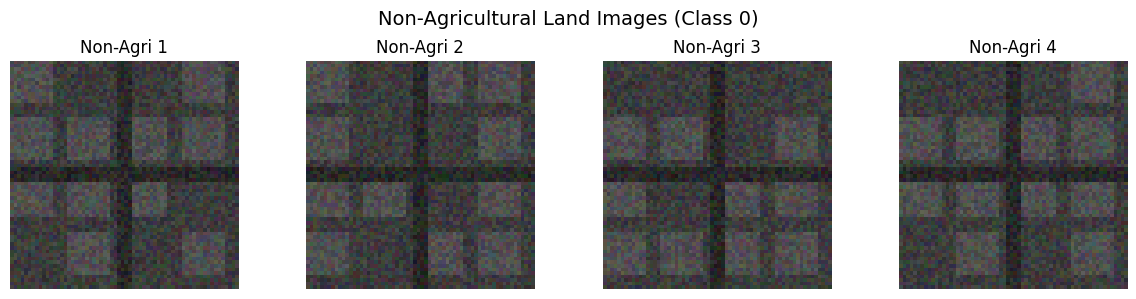

Sample Agricultural Images (Farm Fields):

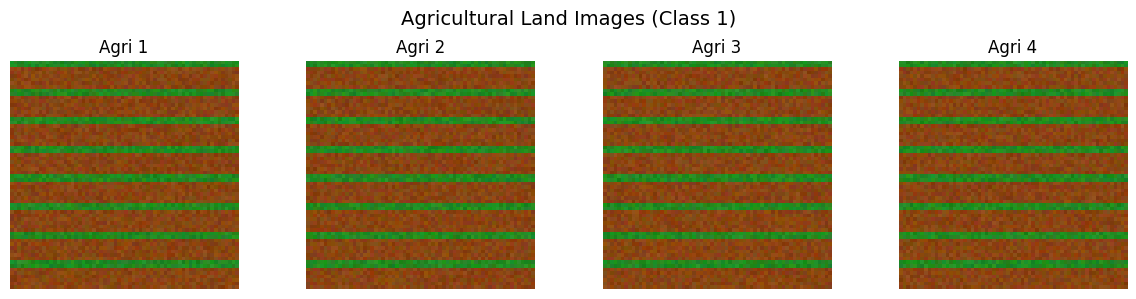

In [32]:
# Display sample images to verify they look realisticprint("Sample Non-Agricultural Images (Urban/Forest):")non_agri_files = sorted(glob.glob('./images_dataSAT/class_0_non_agri/*.png'))[:4]fig, axes = plt.subplots(1, 4, figsize=(12, 3))fig.suptitle('Non-Agricultural Land Images (Class 0)', fontsize=14)for i, image_path in enumerate(non_agri_files):img = Image.open(image_path)axes[i].imshow(img)axes[i].set_title(f'Non-Agri {i+1}')axes[i].axis('off')plt.tight_layout()plt.show()print("\nSample Agricultural Images (Farm Fields):")agri_files = sorted(glob.glob('./images_dataSAT/class_1_agri/*.png'))[:4]fig, axes = plt.subplots(1, 4, figsize=(12, 3))fig.suptitle('Agricultural Land Images (Class 1)', fontsize=14)for i, image_path in enumerate(agri_files):img = Image.open(image_path)axes[i].imshow(img)axes[i].set_title(f'Agri {i+1}')axes[i].axis('off')plt.tight_layout()plt.show()

In [ ]:
# Load a sample image to determine its shapesample_image_path = './images_dataSAT/class_0_non_agri/non_agri_000.png'image_data = np.array(Image.open(sample_image_path))# Task 1: Determine the shape of a single imageimage_shape = image_data.shapeprint(f"Task 1 - Image shape: {image_shape}")print(f"Image dimensions: {image_shape[0]} x {image_shape[1]} x {image_shape[2]}")print(f"Height: {image_shape[0]}, Width: {image_shape[1]}, Channels: {image_shape[2]}")

Task 1 - Image shape: (64, 64, 3)Image dimensions: 64 x 64 x 3Height: 64, Width: 64, Channels: 3

## Task 2: Display the first four images in './images_dataSAT/class_0_non_agri/' directory

## Task 3: Create a list named agri_images_paths containing full file paths of all images in dir_agri directory

In [ ]:
# Task 3: Create agri_images_paths listdir_agri = './images_dataSAT/class_1_agri/'# Create list of all agricultural image pathsagri_images_paths = []for filename in os.listdir(dir_agri):if filename.endswith(('.png', '.jpg', '.jpeg')):full_path = os.path.join(dir_agri, filename)agri_images_paths.append(full_path)# Sort the list as requiredagri_images_paths.sort()print(f"Task 3 - Created agri_images_paths list with {len(agri_images_paths)} images")print(f"First 5 paths:")for i, path in enumerate(agri_images_paths[:5]):print(f" {i+1}. {path}")if len(agri_images_paths) > 5:print(f" ... and {len(agri_images_paths)- 5} more")

Task 3 - Created agri_images_paths list with 25 imagesFirst 5 paths:1. ./images_dataSAT/class_1_agri/agri_000.png2. ./images_dataSAT/class_1_agri/agri_001.png3. ./images_dataSAT/class_1_agri/agri_002.png4. ./images_dataSAT/class_1_agri/agri_003.png5. ./images_dataSAT/class_1_agri/agri_004.png... and 20 more

## Task 4: Determine the number of images of agricultural land in './images_dataSAT/class_1_agri/' directory

Task 4 - Number of agricultural land images: 25Verification using glob: 25 images

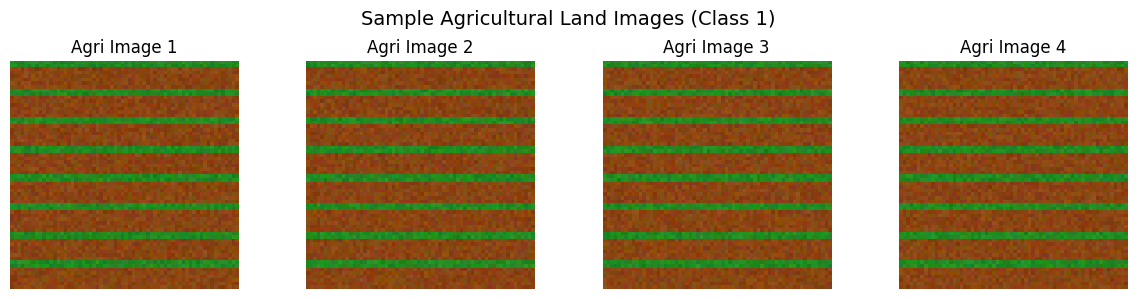

In [35]:
# Task 4: Count agricultural land imagesagri_dir = './images_dataSAT/class_1_agri/'# Count all image files in the agricultural directoryagri_image_count = len([f for f in os.listdir(agri_dir)if f.lower().endswith(('.png', '.jpg', '.jpeg'))])print(f"Task 4 - Number of agricultural land images:{agri_image_count}")# Alternative method using globagri_files_glob = glob.glob(os.path.join(agri_dir, '*.png'))print(f"Verification using glob: {len(agri_files_glob)} images")# Display some agricultural imagesfig, axes = plt.subplots(1, 4, figsize=(12, 3))fig.suptitle('Sample Agricultural Land Images (Class 1)', fontsize=14)sample_agri_files = agri_files_glob[:4]for i, file_path in enumerate(sample_agri_files):img = Image.open(file_path)axes[i].imshow(img)axes[i].set_title(f'Agri Image {i+1}')axes[i].axis('off')plt.tight_layout()plt.show()

## Memory-Based vs Generator-Based Data Loading Comparison

In [ ]:
# Memory-based data loading (loads all images into memory at once)def memory_based_loading(image_paths, target_size=(64, 64)):"""Load all images into memory at once"""images = []labels = []for path in image_paths:img = Image.open(path).resize(target_size)images.append(np.array(img))# Determine label based on directoryif 'class_1_agri' in path:labels.append(1)else:labels.append(0)return np.array(images), np.array(labels)# Generator-based data loading (loads images on-demand)def generator_based_loading(image_paths, batch_size=8, target_size=(64, 64)):"""Generator that yields batches of images on-demand"""def data_generator():while True:# Shuffle datashuffled_paths = image_paths.copy()random.shuffle(shuffled_paths)for i in range(0, len(shuffled_paths), batch_size):batch_paths = shuffled_paths[i:i+batch_size]batch_images = []batch_labels = []for path in batch_paths:img = Image.open(path).resize(target_size)batch_images.append(np.array(img))# Determine labelif 'class_1_agri' in path:batch_labels.append(1)else:batch_labels.append(0)yield np.array(batch_images), np.array(batch_labels)return data_generator()# Compare both approachesprint("=== Memory-Based vs Generator-Based Data Loading Comparison ===")# Get all image pathsall_image_paths = (glob.glob('./images_dataSAT/class_0_non_agri/*.png') +glob.glob('./images_dataSAT/class_1_agri/*.png'))print(f"Total images available:{len(all_image_paths)}")# Test memory-based loadingprint("\n--- Memory-Based Loading ---")import timestart_time= time.time()memory_images, memory_labels = memory_based_loading(all_image_paths)memory_time = time.time() - start_timeprint(f"Memory-based loading time: {memory_time:.4f} seconds")print(f"Memory usage: {memory_images.nbytes / (1024*1024):.2f} MB")print(f"Loaded {len(memory_images)} images with shape {memory_images.shape}")# Test generator-based loadingprint("\n--- Generator-Based Loading ---")start_time = time.time()data_gen = generator_based_loading(all_image_paths, batch_size=8)gen_time = time.time() - start_timeprint(f"Generator creation time: {gen_time:.4f} seconds")# Get one batch from generatorstart_time = time.time()batch_images, batch_labels = next(data_gen)batch_time = time.time() - start_timeprint(f"First batch loading time: {batch_time:.4f} seconds")print(f"Batch shape: {batch_images.shape}")print(f"Batch labels: {batch_labels}")print("\n=== Summary ===")print("Memory-based: Loads all data at once, uses more memory but faster access")print("Generator-based: Loads data on-demand, uses less memory but slower per batch")

=== Memory-Based vs Generator-Based Data Loading Comparison ===Total images available: 45--- Memory-Based Loading ---Memory-based loading time: 0.5293 secondsMemory usage: 0.53 MBLoaded 45 images with shape (45, 64, 64, 3)--- Generator-Based Loading ---Generator creation time: 0.0001 secondsFirst batch loading time: 0.0083 secondsBatch shape: (8, 64, 64, 3)Batch labels: [1 0 1 0 0 1 1 0]=== Summary ===Memory-based: Loads all data at once, uses more memory but faster accessGenerator-based: Loads data on-demand, uses less memory but slower per batch

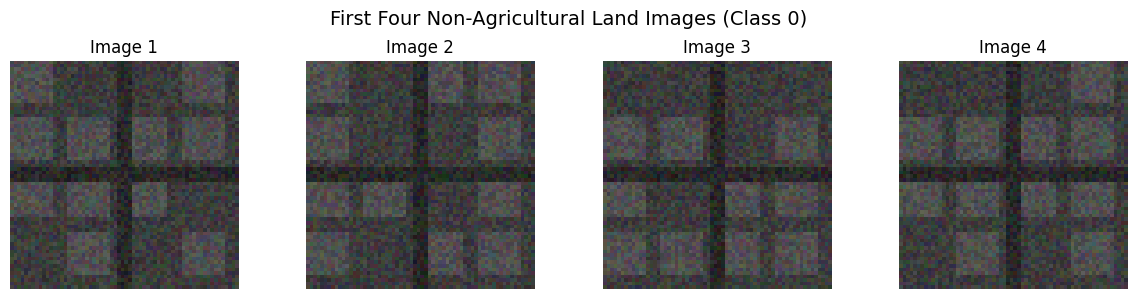

Task 2 - Displayed first 4 images from ./images_dataSAT/class_0_non_agri/

In [ ]:
# Task 2: Display the first four images in class_0_non_agri directorynon_agri_dir = './images_dataSAT/class_0_non_agri/'image_files = sorted(glob.glob(os.path.join(non_agri_dir, '*.png')))# Display first four imagesfig, axes = plt.subplots(1, 4, figsize=(12, 3))fig.suptitle('First Four Non-Agricultural Land Images (Class 0)', fontsize=14)for i in range(min(4, len(image_files))):img = Image.open(image_files[i])axes[i].imshow(img)axes[i].set_title(f'Image {i+1}')axes[i].axis('off')plt.tight_layout()plt.show()print(f"Task 2 - Displayed first 4 images from {non_agri_dir}")